In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [60]:
data = pd.read_csv("laptop_trendyol_data.csv")

In [61]:
data.shape

(1416, 21)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Ekran Boyutu           1075 non-null   object
 1   Ekran KartÄ±           22 non-null     object
 2   Ekran Kartı            1172 non-null   object
 3   Ekran Yenileme HÄ±zÄ±  5 non-null      object
 4   Ekran Yenileme Hızı    411 non-null    object
 5   Garanti Tipi           535 non-null    object
 6   Hard Disk Kapasitesi   168 non-null    object
 7   KullanÄ±m AmacÄ±       6 non-null      object
 8   Kullanım Amacı         284 non-null    object
 9   Ram (Sistem BelleÄŸi)  22 non-null     object
 10  Ram (Sistem Belleği)   1183 non-null   object
 11  SSD Kapasitesi         1205 non-null   object
 12  Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k        21 non-null     object
 13  Ä°ÅŸlemci Tipi         22 non-null     object
 14  Ä°ÅŸletim Sistemi      22 non-null     object
 15  Çözünürlük           

In [63]:
data.describe()

,Ekran Boyutu,Ekran KartÄ±,Ekran Kartı,Ekran Yenileme HÄ±zÄ±,Ekran Yenileme Hızı,Garanti Tipi,Hard Disk Kapasitesi,KullanÄ±m AmacÄ±,Kullanım Amacı,Ram (Sistem BelleÄŸi),...,SSD Kapasitesi,Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k,Ä°ÅŸlemci Tipi,Ä°ÅŸletim Sistemi,Çözünürlük,İşlemci Tipi,İşletim Sistemi,Marka,url,price
count,1075,22,1172,5,411,535,168,6,284,22,...,1205,21,22,22,1121,1183,1183,1416,1416,1416
unique,30,13,54,1,6,3,7,2,4,4,...,15,3,6,2,20,30,7,29,1406,940
top,"15,6 inç",Intel Iris Graphics,AMD Radeon Graphics,144 Hz,144 Hz,Resmi Distribütör Garantili,1 TB,Ofis - Ä°ÅŸ,Ofis - İş,8 GB,...,512 GB,1920 x 1080,Intel Core i5,Free Dos,1920 x 1080,Intel Core i5,Free Dos,ASUS,https://www.trendyol.com//dell/inspiron-15-352...,29.999 TL
freq,723,5,163,5,278,502,46,5,183,11,...,468,18,10,14,883,380,671,295,2,14


In [64]:
data.isna().sum()

Ekran Boyutu              341
Ekran KartÄ±             1394
Ekran Kartı               244
Ekran Yenileme HÄ±zÄ±    1411
Ekran Yenileme Hızı      1005
Garanti Tipi              881
Hard Disk Kapasitesi     1248
KullanÄ±m AmacÄ±         1410
Kullanım Amacı           1132
Ram (Sistem BelleÄŸi)    1394
Ram (Sistem Belleği)      233
SSD Kapasitesi            211
Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k          1395
Ä°ÅŸlemci Tipi           1394
Ä°ÅŸletim Sistemi        1394
Çözünürlük                295
İşlemci Tipi              233
İşletim Sistemi           233
Marka                       0
url                         0
price                       0
dtype: int64

Sütun isimlerini düzenleme

In [65]:
data = data.drop(["Ekran KartÄ±","Ekran Yenileme HÄ±zÄ±","KullanÄ±m AmacÄ±","Ram (Sistem BelleÄŸi)","Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k","Ä°ÅŸlemci Tipi","Ä°ÅŸletim Sistemi","url"],axis=1)


In [66]:
data=data.rename(columns = {'İşletim Sistemi':'İşletim_Sistemi',"İşlemci Tipi":"İşlemci_Tipi",'Ekran Kartı':'Ekran_Kartı','Ekran Boyutu':'Ekran_Boyutu','Ekran Yenileme Hızı':'Ekran_Yenileme_Hızı','Hard Disk Kapasitesi':'Hard_Disk_Kapasitesi','SSD Kapasitesi':'SSD_Kapasitesi',"Ram (Sistem Belleği)":"Ram"})

In [67]:
data.columns

Index(['Ekran_Boyutu', 'Ekran_Kartı', 'Ekran_Yenileme_Hızı', 'Garanti Tipi',
       'Hard_Disk_Kapasitesi', 'Kullanım Amacı', 'Ram', 'SSD_Kapasitesi',
       'Çözünürlük', 'İşlemci_Tipi', 'İşletim_Sistemi', 'Marka', 'price'],
      dtype='object')

In [68]:
data.head(5)

,Ekran_Boyutu,Ekran_Kartı,Ekran_Yenileme_Hızı,Garanti Tipi,Hard_Disk_Kapasitesi,Kullanım Amacı,Ram,SSD_Kapasitesi,Çözünürlük,İşlemci_Tipi,İşletim_Sistemi,Marka,price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monster,29.999 TL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LENOVO,14.399 TL
2,"15,6 inç",Intel UHD Graphics,NaN,NaN,NaN,Ofis - İş,8 GB,512 GB,1920 x 1080,Intel Core i5,Free Dos,LENOVO,12.999 TL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casper,7.299 TL
4,"15,6 inç",Dahili Ekran Kartı,NaN,NaN,NaN,Ev - Okul,4 GB,SSD Yok,1366 x 768,Intel Celeron,Free Dos,LENOVO,6.545 TL


Unique değerlere bakma

In [69]:
columns = data.columns
for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")
    unique_count = data[column].nunique()
    print(f"Number of unique values in '{column}': {unique_count}\n")

Unique values in 'Ekran_Boyutu': [nan '15,6 inç' '13,3 inç' '14 inç' '15,6 inÃ§' '16,1 inç' '13,6 inç'
 '16 inç' '14,1 inÃ§' '17,3 inç' '13 inç' '17 inç' '15 inç' '11,6 inç'
 '14 inÃ§' '16 inÃ§' '14,1 inç' 'Belirtilmemiş' '10,1 inç' '18 inç'
 '17,3 inÃ§' '14,2 inç' '10 inç' '16,1 inÃ§' '14,5 inç' '12,4 inç'
 '12,5 inç' '18,4 inç' '10,6 inç' '11 inç' '13,4 inç']

Number of unique values in 'Ekran_Boyutu': 30

Unique values in 'Ekran_Kartı': [nan 'Intel UHD Graphics' 'Dahili Ekran Kartı' 'AMD Radeon Graphics'
 'Intel Iris Graphics' 'Nvidia GeForce RTX 3050 Ti' 'M2 8 Çekirdekli'
 'Nvidia GeForce RTX 3050' 'Nvidia GeForce RTX 4050'
 'Nvidia GeForce RTX 4060' 'Intel HD Graphics' 'Intel XE Graphics'
 'M2 10 Çekirdekli' 'Intel UHD Graphics 600' 'Intel HD Graphics 610'
 'AMD Radeon RX6500M' 'Nvidia GeForce RTX 2050' 'Nvidia GeForce RTX 4090'
 'Nvidia GeForce GTX 1650' 'Nvidia GeForce RTX3060'
 'Nvidia GeForce RTX 4070' 'Belirtilmemiş' 'Nvidia GeForce RTX 3070Ti'
 'AMD Radeon Vega 8' 'M3' 'Nvid

Garanti Tipi sütununu düzenleme

In [70]:
data['Garanti Tipi'].replace('Resmi DistribÃ¼tÃ¶r Garantili', 'Resmi Distribütör Garantili', inplace=True)

TB-GB birim dönüşümü ve kaldırma  "Hz" "inç" birimlerini kaldırma  ve floata çevirme

In [71]:
cleaned_prices = []  

for value in data['price']:
    # Veri virgül içeriyorsa
    if ',' in value:
        cleaned_value = float(value.split(',')[0].replace('.', ''))  # Virgül sonrasını at, noktaları kaldır ve float'a çevir
        cleaned_prices.append(cleaned_value)
    # Veri 'TL' içeriyorsa
    elif 'TL' in value:
        cleaned_value = float(value.replace(' TL', '').replace('.', ''))  # 'TL' ibaresini kaldır, noktaları kaldır ve float'a çevir
        cleaned_prices.append(cleaned_value)
    else:
        cleaned_prices.append(float(value))  # Diğer durumlarda doğrudan float'a çevirip ekle

data['price'] = cleaned_prices  # Temizlenmiş verileri DataFrame'e ekle



def convert_to_gb(capacity):
    if 'TB' in capacity:  
        return float(capacity.replace('TB', '')) * 1024  
    elif 'GB' in capacity:  
        return float(capacity.replace('GB', ''))  
    elif capacity in ['Yok', 'SSD Yok']:  
        return np.nan
    else:
        return capacity  
data['SSD_Kapasitesi'] = data['SSD_Kapasitesi'].apply(lambda x: convert_to_gb(x) if isinstance(x, str) else x)




def convert_to_gb(capacity):
    if 'TB' in capacity:  
        return float(capacity.replace('TB', '')) * 1024  
    elif 'GB' in capacity: 
        return float(capacity.replace('GB', '')) 
    else:
        return capacity  
data['Hard_Disk_Kapasitesi'] = data['Hard_Disk_Kapasitesi'].apply(lambda x: convert_to_gb(x) if isinstance(x, str) else x)




data['Ekran_Boyutu'] = data['Ekran_Boyutu'].replace(['Belirtilmemiş'], np.nan, regex=True)
data['Ekran_Boyutu'] = data['Ekran_Boyutu'].astype(str).str.replace('inç', '').str.replace('inÃ§', '').str.replace(',', '.').astype(float)



data['Ekran_Yenileme_Hızı'] = data['Ekran_Yenileme_Hızı'].replace('Hz', '', regex=True).astype(str).astype(float)



data['Ram'] = data['Ram'].replace('GB', '', regex=True).astype(str).astype(float)

Tekrar unique değerlere bakma

In [72]:
for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")
    unique_count = data[column].nunique()
    print(f"Number of unique values in '{column}': {unique_count}\n")

Unique values in 'Ekran_Boyutu': [ nan 15.6 13.3 14.  16.1 13.6 16.  14.1 17.3 13.  17.  15.  11.6 10.1
 18.  14.2 10.  14.5 12.4 12.5 18.4 10.6 11.  13.4]

Number of unique values in 'Ekran_Boyutu': 23

Unique values in 'Ekran_Kartı': [nan 'Intel UHD Graphics' 'Dahili Ekran Kartı' 'AMD Radeon Graphics'
 'Intel Iris Graphics' 'Nvidia GeForce RTX 3050 Ti' 'M2 8 Çekirdekli'
 'Nvidia GeForce RTX 3050' 'Nvidia GeForce RTX 4050'
 'Nvidia GeForce RTX 4060' 'Intel HD Graphics' 'Intel XE Graphics'
 'M2 10 Çekirdekli' 'Intel UHD Graphics 600' 'Intel HD Graphics 610'
 'AMD Radeon RX6500M' 'Nvidia GeForce RTX 2050' 'Nvidia GeForce RTX 4090'
 'Nvidia GeForce GTX 1650' 'Nvidia GeForce RTX3060'
 'Nvidia GeForce RTX 4070' 'Belirtilmemiş' 'Nvidia GeForce RTX 3070Ti'
 'AMD Radeon Vega 8' 'M3' 'Nvidia GeForce MX350' 'AMD'
 'Nvidia GeForce MX450' 'AMD Radeon Vega 3' 'Intel UHD Graphics 620'
 'Paylaşımlı' 'Intel Iris Pro Graphics' 'Intel HD Graphics 620'
 'Nvidia GeForce RTX 3070' 'Nvidia GeForce RTX 3080

In [73]:
data.describe()

,Ekran_Boyutu,Ekran_Yenileme_Hızı,Hard_Disk_Kapasitesi,Ram,SSD_Kapasitesi,price
count,"1,073.00",411.00,168.00,"1,183.00","1,177.00","1,416.00"
mean,15.40,154.01,561.96,17.28,692.48,"30,090.38"
std,0.94,33.90,308.29,13.10,531.78,"24,306.57"
min,10.00,90.00,32.00,1.00,32.00,"3,999.00"
25%,15.60,144.00,256.00,8.00,500.00,"15,499.00"
50%,15.60,144.00,512.00,16.00,512.00,"24,049.00"
75%,15.60,144.00,"1,024.00",16.00,"1,024.00","35,999.00"
max,18.40,360.00,"1,024.00",128.00,"8,192.00","187,349.00"


Tekrar eden satırları silme

In [74]:
data.duplicated().any()

True

In [75]:
data = data.drop_duplicates()

In [76]:
data.duplicated().any()

False

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1415
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ekran_Boyutu          1060 non-null   float64
 1   Ekran_Kartı           1158 non-null   object 
 2   Ekran_Yenileme_Hızı   405 non-null    float64
 3   Garanti Tipi          532 non-null    object 
 4   Hard_Disk_Kapasitesi  164 non-null    float64
 5   Kullanım Amacı        280 non-null    object 
 6   Ram                   1169 non-null   float64
 7   SSD_Kapasitesi        1164 non-null   float64
 8   Çözünürlük            1109 non-null   object 
 9   İşlemci_Tipi          1169 non-null   object 
 10  İşletim_Sistemi       1169 non-null   object 
 11  Marka                 1391 non-null   object 
 12  price                 1391 non-null   float64
dtypes: float64(6), object(7)
memory usage: 152.1+ KB


Aykırı değerleri temizleme

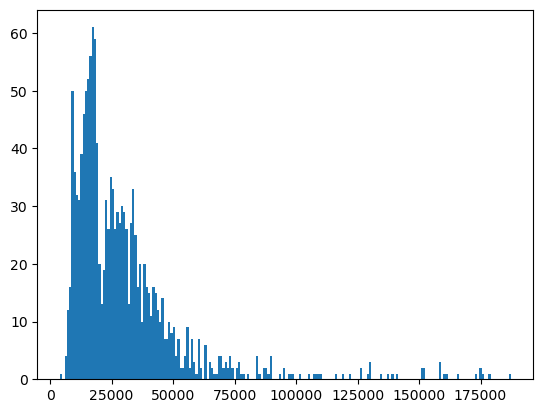

In [78]:
plt.figure()
plt.hist(data['price'], bins=200 ) 
plt.show()


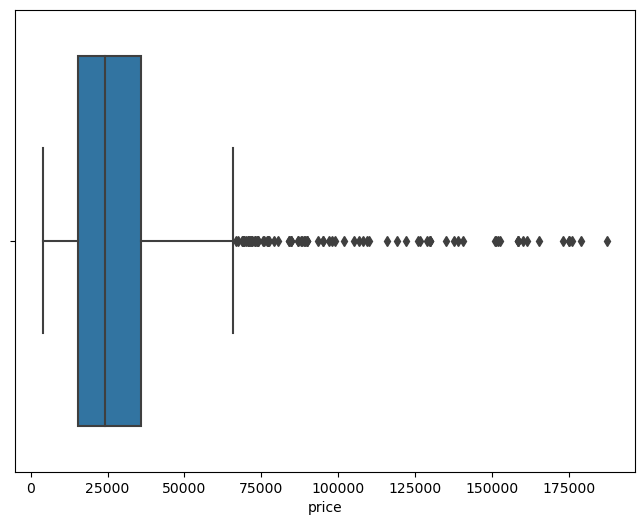

Aykırı Değerlerden Önceki Veri Seti Boyutu: (1391, 13)

Aykırı Değerler Boyutu: (86, 13)

Aykırı Değerler Çıkarıldıktan Sonra Veri Seti Boyutu: (1305, 13)


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price sütununun Boxplot'u
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.show()

# Önceki veri seti boyutunu yazdırma
print("Aykırı Değerlerden Önceki Veri Seti Boyutu:", data.shape)

# Aykırı değerleri belirleme
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtreleme
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


print("\nAykırı Değerler Boyutu:", outliers.shape)

# Aykırı değerleri çıkarılmış son veri seti boyutunu yazdırma
print("\nAykırı Değerler Çıkarıldıktan Sonra Veri Seti Boyutu:",data.shape)



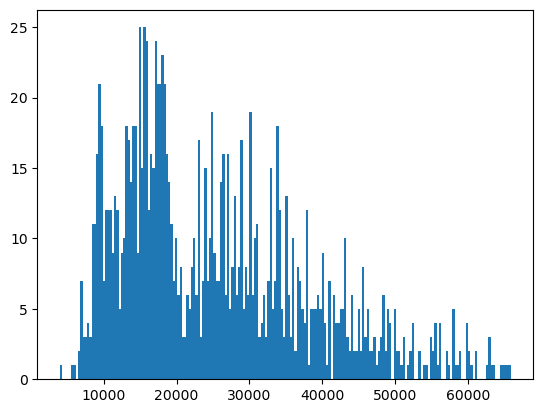

In [80]:
plt.figure()
plt.hist(data['price'], bins=200 ) 
plt.show()




<Axes: >

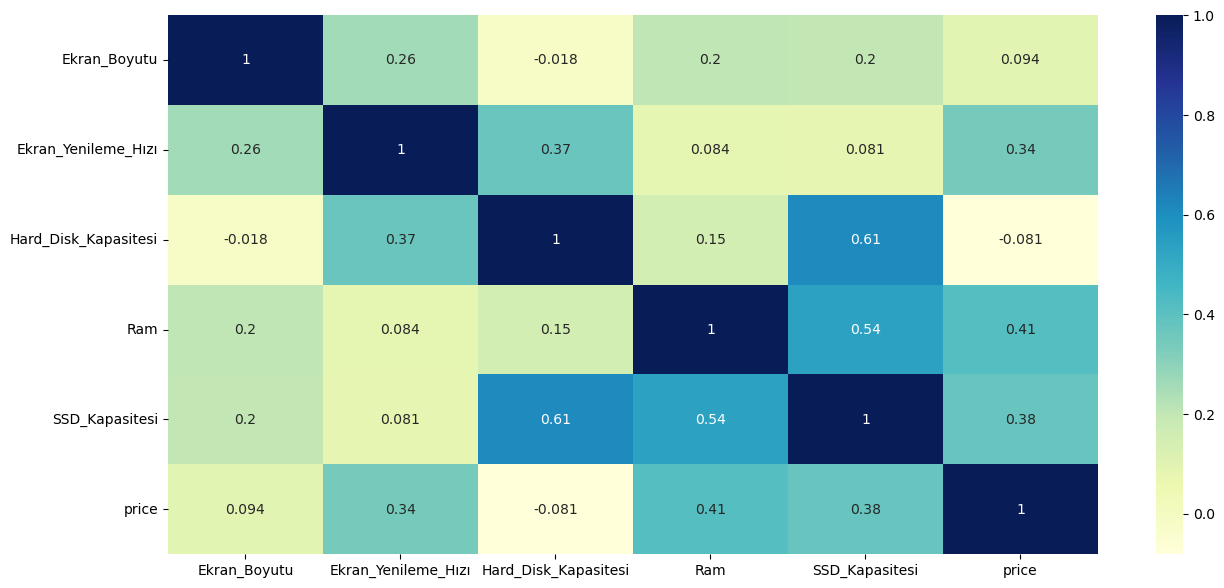

In [81]:
plt.figure(figsize=(15,7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap= "YlGnBu")

In [82]:
corr_matrix['price'].sort_values(ascending=False)

price                   1.00
Ram                     0.41
SSD_Kapasitesi          0.38
Ekran_Yenileme_Hızı     0.34
Ekran_Boyutu            0.09
Hard_Disk_Kapasitesi   -0.08
Name: price, dtype: float64

eksik değerleri doldurma

In [83]:
data.isnull().sum()

Ekran_Boyutu             305
Ekran_Kartı              222
Ekran_Yenileme_Hızı      948
Garanti Tipi             799
Hard_Disk_Kapasitesi    1144
Kullanım Amacı          1039
Ram                      211
SSD_Kapasitesi           214
Çözünürlük               269
İşlemci_Tipi             211
İşletim_Sistemi          211
Marka                      0
price                      0
dtype: int64

In [84]:
data.drop(["Ekran_Yenileme_Hızı","Garanti Tipi","Hard_Disk_Kapasitesi","Kullanım Amacı"],axis=1,inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1415
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ekran_Boyutu     1000 non-null   float64
 1   Ekran_Kartı      1083 non-null   object 
 2   Ram              1094 non-null   float64
 3   SSD_Kapasitesi   1091 non-null   float64
 4   Çözünürlük       1036 non-null   object 
 5   İşlemci_Tipi     1094 non-null   object 
 6   İşletim_Sistemi  1094 non-null   object 
 7   Marka            1305 non-null   object 
 8   price            1305 non-null   float64
dtypes: float64(4), object(5)
memory usage: 102.0+ KB


In [86]:
ortalama = data['Ekran_Boyutu'].mean()
data['Ekran_Boyutu'].fillna(ortalama, inplace=True)

In [87]:
en_sık_değer = data['Ekran_Kartı'].mode()[0]
data['Ekran_Kartı'].fillna(en_sık_değer, inplace=True)

In [88]:
median_değer = data['Ram'].median()
data['Ram'].fillna(median_değer, inplace=True)

In [89]:
en_sık_değer = data['SSD_Kapasitesi'].mode()[0]
data['SSD_Kapasitesi'].fillna(en_sık_değer, inplace=True)

In [90]:
en_sık_değer = data['Çözünürlük'].mode()[0]
data['Çözünürlük'].fillna(en_sık_değer, inplace=True)

In [91]:
en_sık_değer = data['İşlemci_Tipi'].mode()[0]
data['İşlemci_Tipi'].fillna(en_sık_değer, inplace=True)

In [92]:
en_sık_değer = data['İşletim_Sistemi'].mode()[0]
data['İşletim_Sistemi'].fillna(en_sık_değer, inplace=True)

In [93]:
data.isnull().sum()

Ekran_Boyutu       0
Ekran_Kartı        0
Ram                0
SSD_Kapasitesi     0
Çözünürlük         0
İşlemci_Tipi       0
İşletim_Sistemi    0
Marka              0
price              0
dtype: int64

Kategorik değerleri sayısallaştırma

In [94]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
labelEncoder = LabelEncoder()


In [95]:
print(data["Ekran_Kartı"].value_counts())
data["Ekran_Kartı"] = labelEncoder.fit_transform(data["Ekran_Kartı"])
print(data["Ekran_Kartı"].value_counts())


AMD Radeon Graphics           383
Intel Iris Graphics           133
Intel UHD Graphics            117
Dahili Ekran Kartı             98
Nvidia GeForce RTX 4050        90
Nvidia GeForce RTX 4060        77
Nvidia GeForce RTX 3050        74
Nvidia GeForce RTX 3050 Ti     33
Nvidia GeForce RTX 4070        28
Intel HD Graphics              25
Nvidia GeForce RTX3060         24
Intel XE Graphics              24
Nvidia GeForce RTX 2050        22
Intel UHD Graphics 600         20
Nvidia GeForce GTX 1650        16
Nvidia GeForce RTX 3080        13
M2 10 Çekirdekli               12
Nvidia GeForce MX330           11
Nvidia GeForce MX350           10
M2 8 Çekirdekli                10
Nvidia GeForce MX450            9
Belirtilmemiş                   8
Paylaşımlı                      7
Nvidia GeForce RTX 3070         6
AMD                             6
Nvidia GeForce RTX 3070Ti       5
Nvidia GeForce MX550            5
AMD Radeon R5                   4
AMD Radeon RX6500M              3
AMD Radeon Veg

In [96]:
print(data["Çözünürlük"].value_counts())
data["Çözünürlük"] = labelEncoder.fit_transform(data["Çözünürlük"])
print(data["Çözünürlük"].value_counts())


1920 x 1080    1131
1366 x 768       54
2560 x 1600      42
1920 x 1200      41
2560 x 1440      11
2880 x 1800       6
2880 x 1620       3
4480 x 2520       3
1280 x 800        3
3072 x 1920       2
5120 x 2880       1
2550 x 1600       1
3840 x 2160       1
2340 x 1440       1
2160 x 1440       1
1920 x 1280       1
3024 x 1964       1
3840 x 2400       1
2560 x 1664       1
Name: Çözünürlük, dtype: int64
2     1131
1       54
9       42
3       41
8       11
12       6
11       3
17       3
0        3
14       2
18       1
7        1
15       1
6        1
5        1
4        1
13       1
16       1
10       1
Name: Çözünürlük, dtype: int64


In [97]:
print(data["İşlemci_Tipi"].value_counts())
data["İşlemci_Tipi"] = labelEncoder.fit_transform(data["İşlemci_Tipi"])
print(data["İşlemci_Tipi"].value_counts())


Intel Core i5              586
Intel Core i7              224
AMD Ryzen 5                136
AMD Ryzen 7                127
Intel Core i3               81
Intel Celeron               49
AMD Ryzen 3                 17
Intel Core i9               16
Apple M1                    11
Apple M2                    11
M2                          11
AMD Ryzen 9                  7
AMD Athlon                   5
MediaTek P60T                3
Intel Atom                   3
AMD A4                       3
AMD E                        2
AMD                          2
Apple M1 Pro                 1
Intel Pentium Dual Core      1
Intel Pentium                1
Intel Xeon                   1
M3                           1
AMD A9                       1
AMD A6                       1
Intel Xeon W Serisi          1
Ryzen Z1 Extreme             1
Intel Core M                 1
Ryzen Z1                     1
Name: İşlemci_Tipi, dtype: int64
17    586
18    224
7     136
8     127
16     81
14     49
6      1

In [98]:
print(data["İşletim_Sistemi"].value_counts())
data["İşletim_Sistemi"] = labelEncoder.fit_transform(data["İşletim_Sistemi"])
print(data["İşletim_Sistemi"].value_counts())


Free Dos      851
Windows       394
Mac Os         35
Linux          13
Windows 11      5
Chrome OS       4
Ubuntu          3
Name: İşletim_Sistemi, dtype: int64
1    851
5    394
3     35
2     13
6      5
0      4
4      3
Name: İşletim_Sistemi, dtype: int64


In [99]:
print(data["Marka"].value_counts())
data["Marka"] = labelEncoder.fit_transform(data["Marka"])
print(data["Marka"].value_counts())


ASUS              272
HP                260
LENOVO            254
ACER              129
Dell               88
Casper             81
MSI                63
Monster            61
Apple              41
Huawei             22
Gigabyte            5
Toshiba             4
Samsung             4
Dynabook            3
Technopc            3
Xiaomi              2
Hometech            2
Honor               2
Wenn                1
Tecno               1
Everest             1
I-LIFE DIGITAL      1
Game Garaj          1
GPTURKGRUP          1
FOSILTECH           1
DTS Teknoloji       1
I-Life              1
Name: Marka, dtype: int64
1     272
12    260
18    254
0     129
5      88
3      81
19     63
20     61
2      41
15     22
11      5
24      4
21      4
6       3
22      3
26      2
13      2
14      2
25      1
23      1
7       1
16      1
10      1
9       1
8       1
4       1
17      1
Name: Marka, dtype: int64


<Axes: >

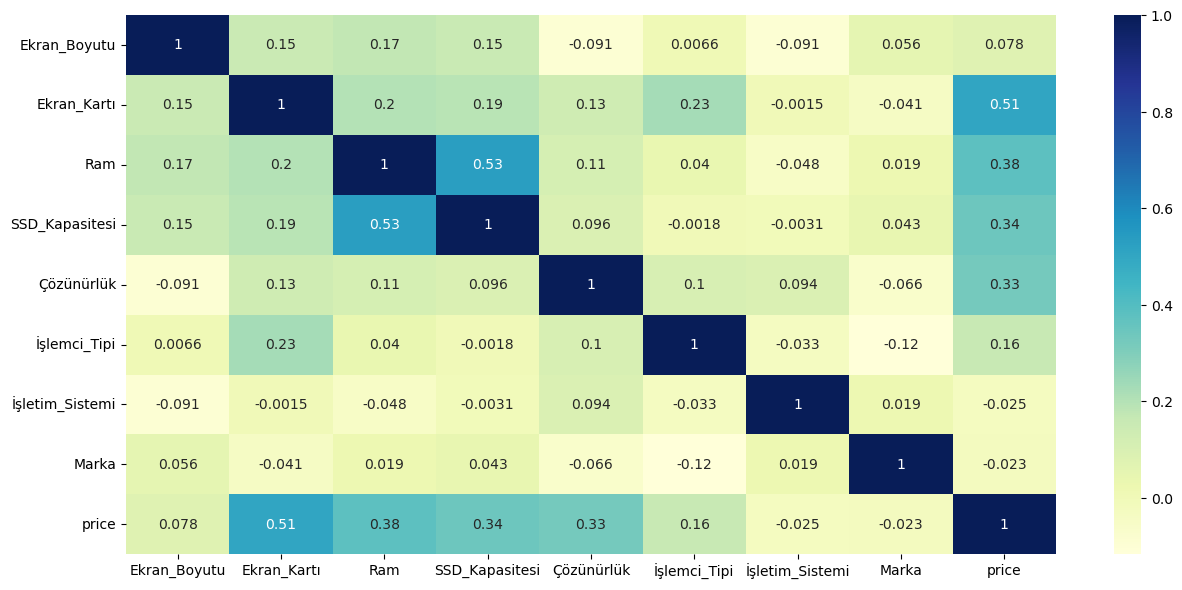

In [100]:
plt.figure(figsize=(15,7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [101]:
data.describe()

,Ekran_Boyutu,Ekran_Kartı,Ram,SSD_Kapasitesi,Çözünürlük,İşlemci_Tipi,İşletim_Sistemi,Marka,price
count,"1,305.00","1,305.00","1,305.00","1,305.00","1,305.00","1,305.00","1,305.00","1,305.00","1,305.00"
mean,15.34,20.54,15.86,623.28,2.44,14.76,2.29,9.21,"25,320.95"
std,0.79,15.54,10.31,432.65,1.95,4.43,1.84,7.57,"12,949.36"
min,10.00,0.00,1.00,32.00,0.00,0.00,0.00,0.00,"3,999.00"
25%,15.34,3.00,8.00,512.00,2.00,13.00,1.00,1.00,"15,299.00"
50%,15.60,18.00,16.00,512.00,2.00,17.00,1.00,12.00,"22,899.00"
75%,15.60,36.00,16.00,512.00,2.00,17.00,5.00,18.00,"33,888.00"
max,18.00,50.00,128.00,"8,192.00",18.00,28.00,6.00,26.00,"65,899.00"


# MODELİ EĞİTME

In [104]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [105]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (1044, 8)
x_test : (261, 8)
y_train : (1044,)
y_test : (261,)


1)Linear Regression

mean absolute error:  6835.764913003365
 root mean squared error:  9251.731475528095
Coefficient of determination R^2:  0.46175228259858503


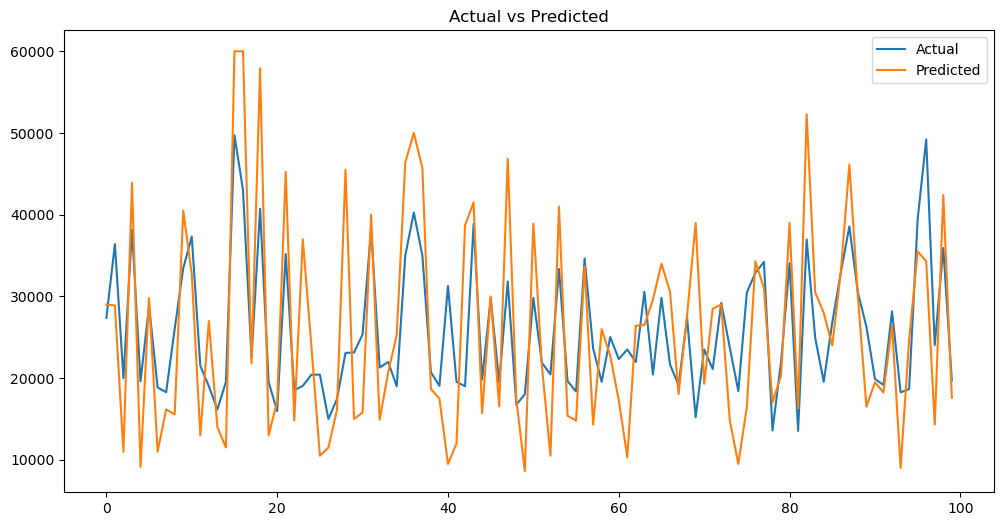

In [106]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict_lr= lr.predict(x_test) 


print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lr))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lr))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lr,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


2)Ridge

mean absolute error:  6835.830273825712
root mean squared error:  9251.782794874904
Coefficient of determination R^2:  0.4617463112627409


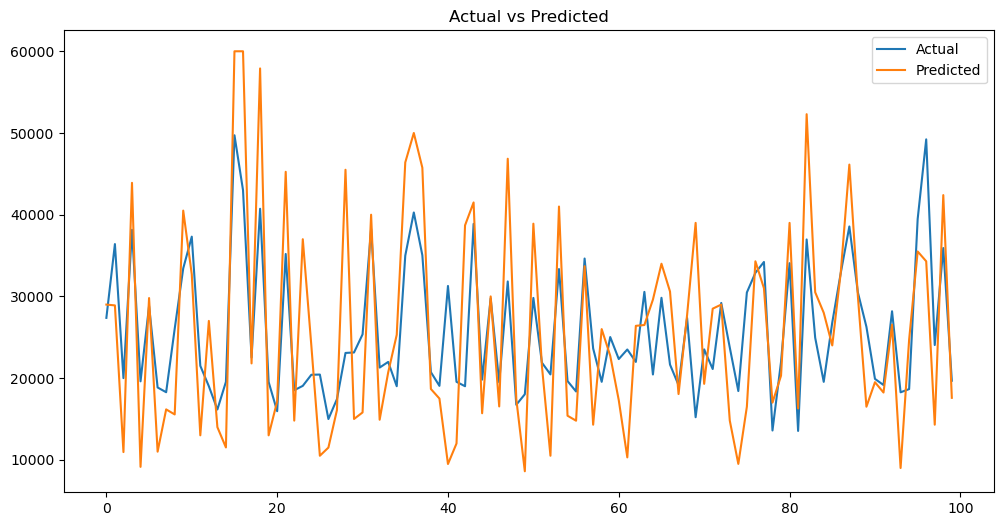

In [108]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )





from sklearn.linear_model import Ridge
rd = Ridge(alpha=1.0)  
rd.fit(x_train, y_train)
y_predict_rd = rd.predict(x_test)




print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rd))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rd)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rd))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rd,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()




3)ElasticNet

mean absolute error:  6874.6389766805205
root mean squared error:  9284.686076262968
Coefficient of determination R^2:  0.45791098445479594


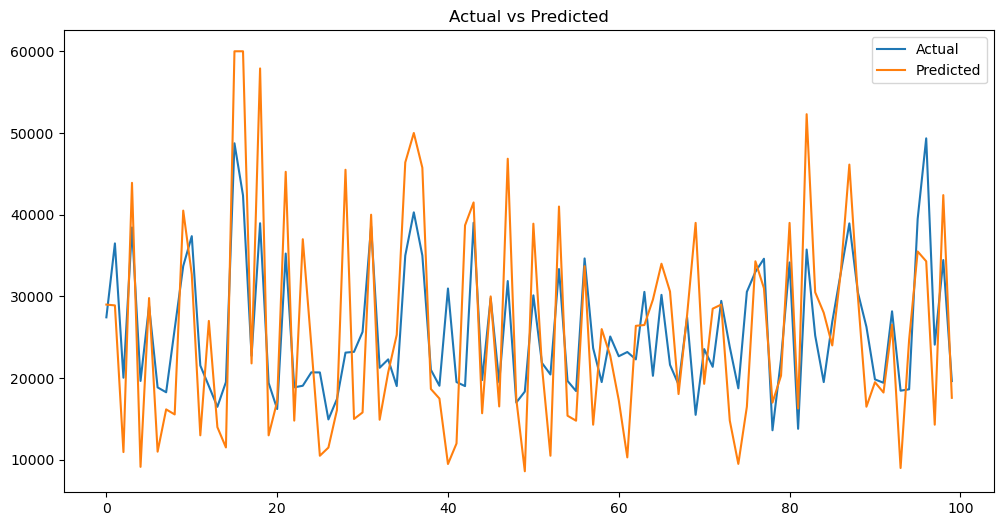

In [109]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

from sklearn.linear_model import ElasticNet
el = ElasticNet() 
el.fit(x_train, y_train)
y_predict_el = el.predict(x_test)




print('mean absolute error: ',mean_absolute_error(y_test, y_predict_el))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_el)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_el))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_el,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()






4)AdaBoost

mean absolute error:  6017.715644104479
root mean squared error:  7758.04344620849
Coefficient of determination R^2:  0.6215220583954233


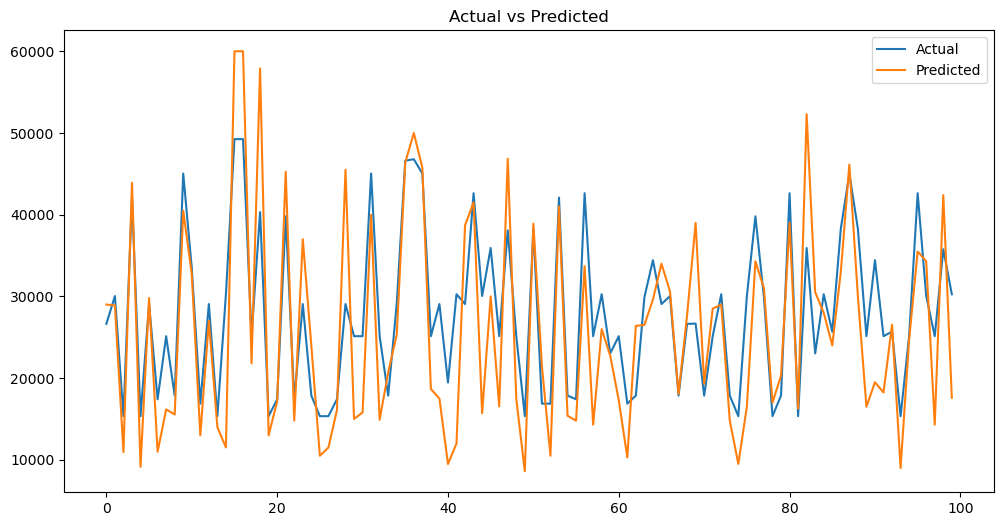

In [110]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )



from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor() 
ad.fit(x_train, y_train)
y_predict_ad = ad.predict(x_test)




print('mean absolute error: ',mean_absolute_error(y_test, y_predict_ad))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_ad)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_ad))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_ad,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()





5)DecisionTree

mean absolute error:  4690.419938299248
 root mean squared error:  7293.529778161753
Coefficient of determination R^2:  0.6654880174832651


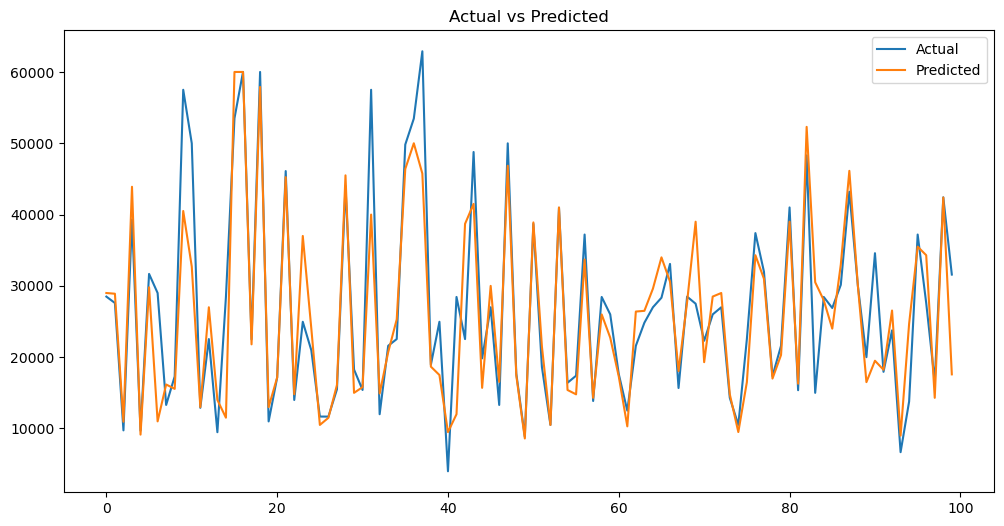

In [111]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_dt))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

6)GradientBoost

mean absolute error:  5607.870191387381
root mean squared error:  7453.715965247547
Coefficient of determination R^2:  0.6506330351528197


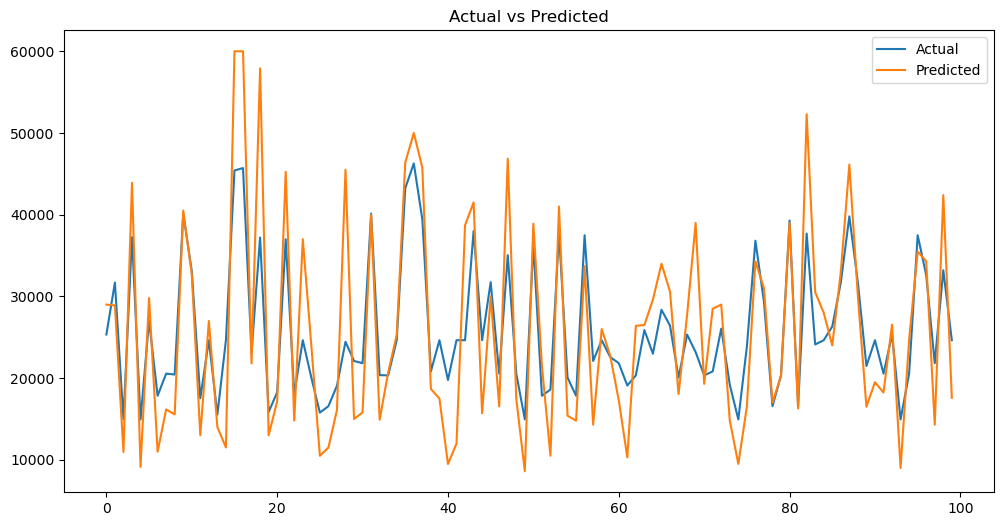

In [120]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )



from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=150)
gb.fit(x_train,y_train)
y_predict_gb = gb.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_gb))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_gb)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_gb))




fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_gb,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


7)RandomForest

mean absolute error:  3927.546194742618
root mean squared error:  6299.425297143707
Coefficient of determination R^2:  0.7504612365935985


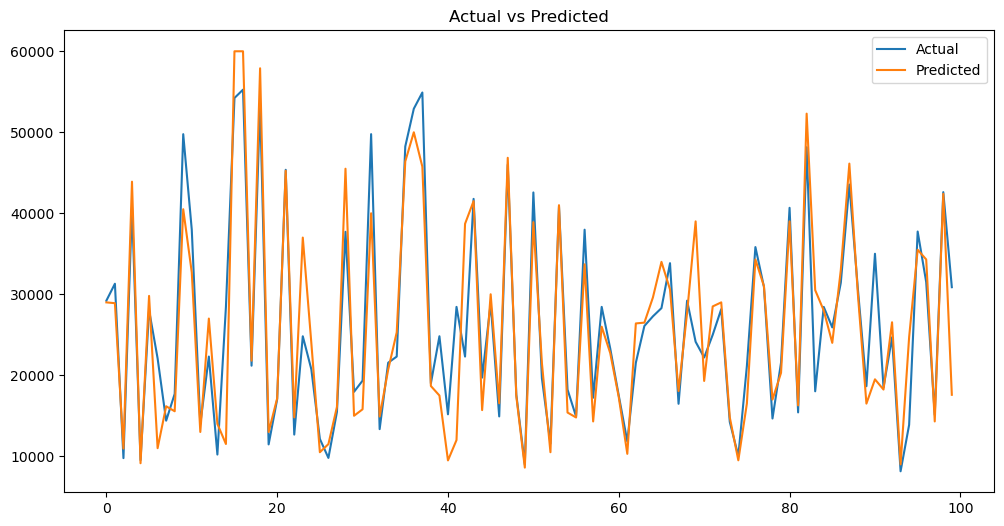

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

GridSearch

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


model = RandomForestRegressor()

# GridSearchCV için parametre grid'i belirleme
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV modelini oluşturma
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')

# Veri üzerinde grid search yapma
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
En iyi skor: 0.723103547916233


7)RandomForest2

mean absolute error:  3842.6870346051805
root mean squared error:  6202.104417895006
Coefficient of determination R^2:  0.7581120100021654


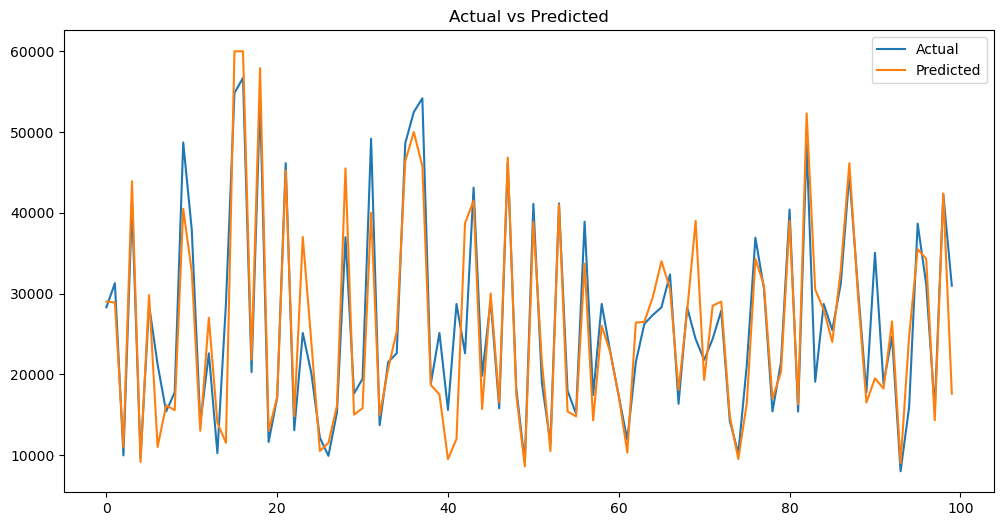

In [117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

Performans Kıyaslama

In [122]:


# Veri çerçevesini oluşturma
final_RMSE = pd.DataFrame(data=[[9251.73,9251.78,9284.68,7758.04,7293.52,7453.71,6202.10],
                                [0.46175,0.46174,0.45791,0.62152,0.66548,0.65063,0.75811]],
                          columns=['Linear Regression', "Ridge", "ElasticNet", "AdaBoost", 'Decision Tree Regressor', "GradientBoosting", 'Random Forest Regressor'],
                          index=['RMSE', 'R2'])

final_RMSE = final_RMSE.T

# Arka planı renklendirme
cm = sns.light_palette('blue', as_cmap=True)
final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE


,RMSE,R2
Linear Regression,9251.730000,0.461750
Ridge,9251.780000,0.461740
ElasticNet,9284.680000,0.457910
AdaBoost,7758.040000,0.621520
Decision Tree Regressor,7293.520000,0.665480
GradientBoosting,7453.710000,0.650630
Random Forest Regressor,6202.100000,0.758110
